### **Ecommerce CRM analysis**

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
import gdown
gdown.download("https://drive.google.com/uc?id=1E4M2dlAAxmJeERJ9ZN970J9_2qiakQ6r", "ecom.csv", quiet=True)

'ecom.csv'

In [192]:
df = pd.read_csv("ecom.csv", encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [193]:
df.shape

(541909, 8)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [195]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [196]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [197]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [198]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
332679,566087,20725,LUNCH BAG RED RETROSPOT,10,2011-09-09 10:24:00,1.65,13319.0,United Kingdom
172182,551520,47566,PARTY BUNTING,3,2011-05-01 11:55:00,4.95,13301.0,United Kingdom
308052,563935,23322,LARGE WHITE HEART OF WICKER,4,2011-08-21 16:24:00,2.95,15547.0,United Kingdom
271488,560696,90214M,"LETTER ""M"" BLING KEY RING",1,2011-07-20 12:14:00,1.25,14606.0,United Kingdom
153517,549749,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,2011-04-12 10:45:00,0.65,12928.0,United Kingdom
241477,558232,84510A,SET OF 4 ENGLISH ROSE COASTERS,1,2011-06-27 14:30:00,1.25,17841.0,United Kingdom
189243,553142,22898,CHILDRENS APRON APPLES DESIGN,2,2011-05-13 13:05:00,1.95,14527.0,United Kingdom
348016,567369,22338,STAR DECORATION PAINTED ZINC,24,2011-09-20 09:06:00,0.65,17527.0,United Kingdom
447704,574959,23319,BOX OF 6 MINI 50'S CRACKERS,2,2011-11-08 10:09:00,2.49,17886.0,United Kingdom
436949,574251,72760B,VINTAGE CREAM 3 BASKET CAKE STAND,2,2011-11-03 13:22:00,9.95,18205.0,United Kingdom


In [199]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


These duplicates are actually from same transaction with different StockCode. So not dropping the duplicates

In [200]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [201]:
stock_desc = df.dropna(subset=['Description']).groupby('StockCode')['Description'].first()
df['Description'] = df.apply(lambda x: stock_desc[x['StockCode']] if pd.isnull(x['Description']) and x['StockCode'] in stock_desc else x['Description'], axis=1)
#Replaced null Description values with the corresponding Description from rows that have the same StockCode.

In [202]:
df['Description'].isnull().sum()

112

In [203]:
df['Description'] = df['Description'].fillna('Unknown')
#Replace remaining null Description values with 'Unknown'

In [204]:
df['Description'].isnull().sum()

0

In [205]:
custid_map = df.dropna(subset=['CustomerID']).groupby('InvoiceNo')['CustomerID'].first()
df['CustomerID'] = df.apply(lambda x: custid_map[x['InvoiceNo']] if pd.isnull(x['CustomerID']) and x['InvoiceNo'] in custid_map else x['CustomerID'],axis=1)
#Replaced null CustomerID values with the corresponding CustomerID from rows that have the same InvoiceNo.

In [206]:
df['CustomerID'].isnull().sum()

135080

There are no Corresponding InvoiceNo with valid CustomerId and no rows with a non-null CustomerID for a given InvoiceNo

In [207]:
df[df['CustomerID'].isnull()]['Country'].value_counts()

,count
Country,
United Kingdom,133600
EIRE,711
Hong Kong,288
Unspecified,202
Switzerland,125
France,66
Israel,47
Portugal,39
Bahrain,2


 * The majority of the missing CustomerIDs (133,600) are from the United Kingdom. Other countries also has some missing values but to a lesser extent. This suggests that the null values are predominantly concentrated in a specific region.

In [208]:
# Coutry wise missing CustomerID values
country_summary = df.groupby('Country').agg(
    total=('CustomerID', 'size'),
    nulls=('CustomerID', lambda x: x.isnull().sum())
)

country_summary['null%'] = ((country_summary['nulls'] / country_summary['total']) * 100).round(2)
country_summary = country_summary.sort_values(by='null%', ascending=False)

country_summary.reset_index()

,Country,total,nulls,null%
0,Hong Kong,288,288,100.00
1,Unspecified,446,202,45.29
2,United Kingdom,495478,133600,26.96
3,Israel,297,47,15.82
4,Bahrain,19,2,10.53
5,EIRE,8196,711,8.67
6,Switzerland,2002,125,6.24
7,Portugal,1519,39,2.57
8,France,8557,66,0.77
9,Sweden,462,0,0.00


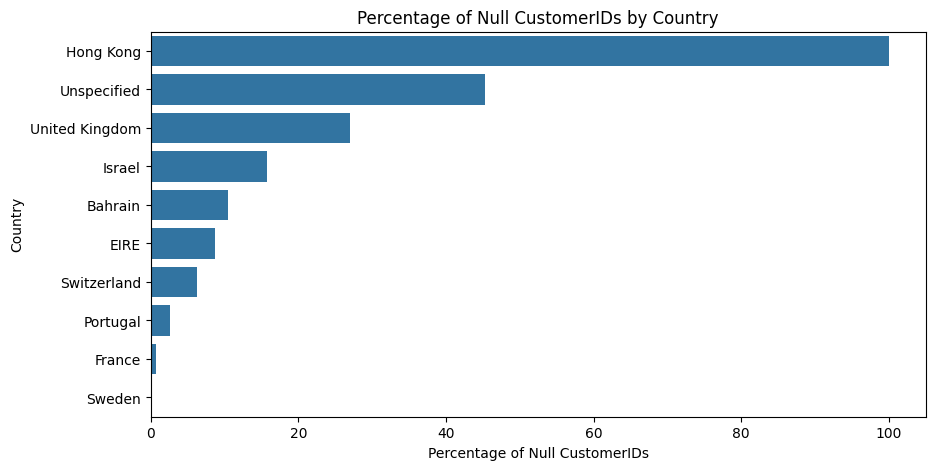

In [227]:
plt.figure(figsize=(10, 5))
sns.barplot(x='null%', y='Country', data=country_summary.head(10).sort_values('null%', ascending=False))
plt.title('Percentage of Null CustomerIDs by Country')
plt.xlabel('Percentage of Null CustomerIDs')
plt.ylabel('Country')
plt.show()

In [220]:
Invoicedate_nulls = df[df['CustomerID'].isnull()]['InvoiceDate'].value_counts()
Invoicedate_nulls.sort_values(ascending=False)

,count
InvoiceDate,
2011-10-31 14:41:00,1114
2011-12-08 09:28:00,749
2011-12-09 10:03:00,731
2011-12-05 17:24:00,721
2011-06-29 15:58:00,705
...,...
2010-12-09 13:12:00,1
2011-10-04 14:14:00,1
2011-10-04 14:03:00,1


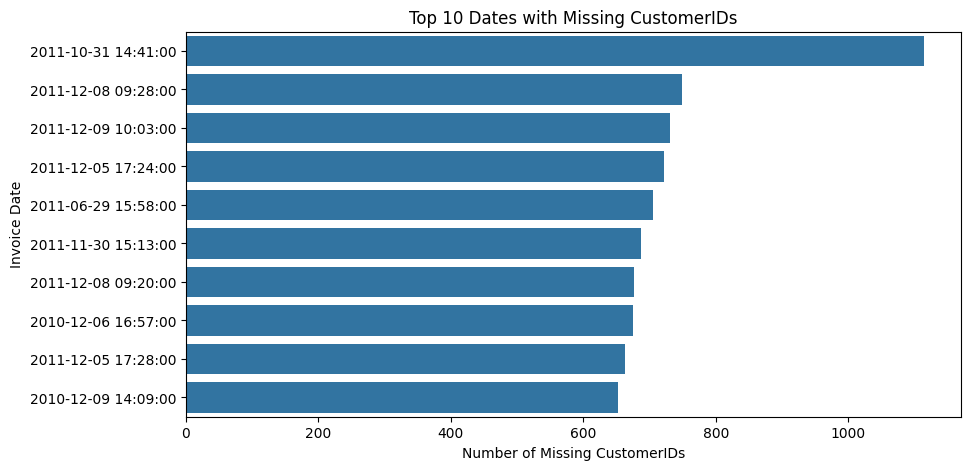

In [224]:
top_10_dates = Invoicedate_nulls.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_dates.values, y=top_10_dates.index)
plt.title('Top 10 Dates with Missing CustomerIDs')
plt.xlabel('Number of Missing CustomerIDs')
plt.ylabel('Invoice Date')
plt.show()

# Imputing missing CustomerID's with Unknown_ group by transaction date.

In [119]:
nan_customerids = df[df['CustomerID'].isnull()]
counter = 1
for invoice_date in nan_customerids['InvoiceDate'].unique():
    df.loc[(df['CustomerID'].isnull()) & (df['InvoiceDate'] == invoice_date), 'CustomerID'] = 'Unknown' + str(counter)
    counter += 1

<ipython-input-119-26d51a99d841>:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [120]:
df[df['InvoiceDate']=='2011-10-31 14:41:00']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,2011-10-31 14:41:00,3.29,Unknown2730,United Kingdom
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,2011-10-31 14:41:00,1.63,Unknown2730,United Kingdom
430239,573585,15039,SANDALWOOD FAN,15,2011-10-31 14:41:00,1.63,Unknown2730,United Kingdom
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,2011-10-31 14:41:00,12.46,Unknown2730,United Kingdom
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,2011-10-31 14:41:00,12.46,Unknown2730,United Kingdom
...,...,...,...,...,...,...,...,...
431346,573585,90209C,PINK ENAMEL+GLASS HAIR COMB,3,2011-10-31 14:41:00,2.07,Unknown2730,United Kingdom
431347,573585,90214S,"LETTER ""S"" BLING KEY RING",1,2011-10-31 14:41:00,0.83,Unknown2730,United Kingdom
431348,573585,DOT,DOTCOM POSTAGE,1,2011-10-31 14:41:00,2019.05,Unknown2730,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,Unknown2730,United Kingdom


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [122]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
177328,552055,22670,FRENCH WC SIGN BLUE METAL,12,2011-05-06 10:32:00,1.25,16353.0,United Kingdom
253300,559162,84559A,3D SHEET OF DOG STICKERS,1,2011-07-06 16:29:00,0.79,Unknown1767,United Kingdom
288010,562128,72741,GRAND CHOCOLATECANDLE,9,2011-08-03 09:07:00,1.45,16150.0,United Kingdom
350181,567616,22992,REVOLVER WOODEN RULER,12,2011-09-21 12:23:00,1.95,14911.0,EIRE
405626,571716,21403,BLUE EGG SPOON,1,2011-10-18 17:05:00,0.42,Unknown2586,United Kingdom
213813,555558,23203,JUMBO BAG DOILEY PATTERNS,2,2011-06-05 14:06:00,2.08,14159.0,United Kingdom
524170,580536,22619,SET OF 6 SOLDIER SKITTLES,4,2011-12-04 16:07:00,3.75,12490.0,France
127377,547209,21506,"FANCY FONT BIRTHDAY CARD,",24,2011-03-21 14:44:00,0.42,13081.0,United Kingdom
486795,577748,84378,SET OF 3 HEART COOKIE CUTTERS,24,2011-11-21 14:24:00,1.45,15159.0,United Kingdom
106056,545308,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,1,2011-03-01 13:19:00,12.75,14656.0,United Kingdom


In [123]:
#Removing decimal from CustomerID
df['CustomerID'] = df['CustomerID'].astype(str)
df['CustomerID'] = df['CustomerID'].apply(lambda x: x.replace('.0', '') if x.endswith('.0') else x)

In [124]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
319888,564912,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2011-08-31 12:33:00,1.65,12490,France
211022,555340,21155,RED RETROSPOT PEG BAG,3,2011-06-02 11:33:00,2.55,13334,United Kingdom
211273,555352,22379,RECYCLING BAG RETROSPOT,100,2011-06-02 12:46:00,1.85,15838,United Kingdom
197985,553978,23203,JUMBO BAG DOILEY PATTERNS,200,2011-05-20 11:03:00,1.65,16182,United Kingdom
253336,559163,84569D,PACK 6 HEART/ICE-CREAM PATCHES,2,2011-07-06 16:33:00,0.83,Unknown1768,United Kingdom
303090,563507,84951A,SET OF 4 PISTACHIO LOVEBIRD COASTER,24,2011-08-17 10:08:00,0.79,14414,United Kingdom
265993,560239,22149,FELTCRAFT 6 FLOWER FRIENDS,6,2011-07-17 11:50:00,2.10,13507,United Kingdom
497308,578361,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6,2011-11-24 10:38:00,2.89,13638,United Kingdom
228442,556932,22570,FELTCRAFT CUSHION RABBIT,1,2011-06-15 15:41:00,7.46,Unknown1595,United Kingdom
103642,545073,22377,BOTTLE BAG RETROSPOT,5,2011-02-28 09:26:00,2.10,14036,United Kingdom


In [125]:
df['Sale_Value'] = df['Quantity'] * df['UnitPrice']

In [126]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Value
284363,561870,84991,60 TEATIME FAIRY CAKE CASES,24,2011-07-31 11:45:00,0.55,14911,EIRE,13.20
398876,571261,21787,RAIN PONCHO RETROSPOT,360,2011-10-16 10:50:00,0.85,12901,United Kingdom,306.00
492858,578149,22457,NATURAL SLATE HEART CHALKBOARD,3,2011-11-23 11:11:00,5.79,Unknown2990,United Kingdom,17.37
201202,554275,22488,NATURAL SLATE RECTANGLE CHALKBOARD,3,2011-05-23 13:17:00,1.65,14903,United Kingdom,4.95
473860,576837,23100,SILVER BELLS TABLE DECORATION,4,2011-11-16 15:16:00,2.46,Unknown2928,United Kingdom,9.84
1564,536544,22375,AIRLINE BAG VINTAGE JET SET BROWN,2,2010-12-01 14:32:00,8.47,Unknown2,United Kingdom,16.94
525416,580622,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-05 12:09:00,2.08,17006,United Kingdom,12.48
305591,563699,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,12,2011-08-18 13:47:00,1.25,13381,United Kingdom,15.00
93640,544303,84991,60 TEATIME FAIRY CAKE CASES,3,2011-02-17 13:28:00,0.55,18116,United Kingdom,1.65
294794,562717,15058B,PINK POLKADOT GARDEN PARASOL,1,2011-08-08 15:42:00,10.79,Unknown2054,United Kingdom,10.79


In [127]:
total_revenue = df['Sale_Value'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $9747747.93


In [128]:
sales = df[df['Quantity'] > 0]
returns = df[df['Quantity'] < 0]

In [129]:
sales[sales['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Value


In [130]:
net_revenue = sales['Sale_Value'].sum()
print(f"Net Revenue: ${net_revenue:.2f}")

Net Revenue: $10644560.42


In [131]:
return_value = returns['Sale_Value'].sum()
print(f"Return Value: ${return_value:.2f}")

Return Value: $-896812.49


In [133]:
sales.describe()

,Quantity,InvoiceDate,UnitPrice,Sale_Value
count,531285.000000,531285,531285.000000,531285.00000
mean,10.655262,2011-07-04 18:15:45.816539136,3.857296,20.03550
min,1.000000,2010-12-01 08:26:00,-11062.060000,-11062.06000
25%,1.000000,2011-03-28 11:59:00,1.250000,3.75000
50%,3.000000,2011-07-20 12:01:00,2.080000,9.90000
75%,10.000000,2011-10-19 12:35:00,4.130000,17.70000
max,80995.000000,2011-12-09 12:50:00,13541.330000,168469.60000
std,156.830323,NaN,41.810047,270.91237


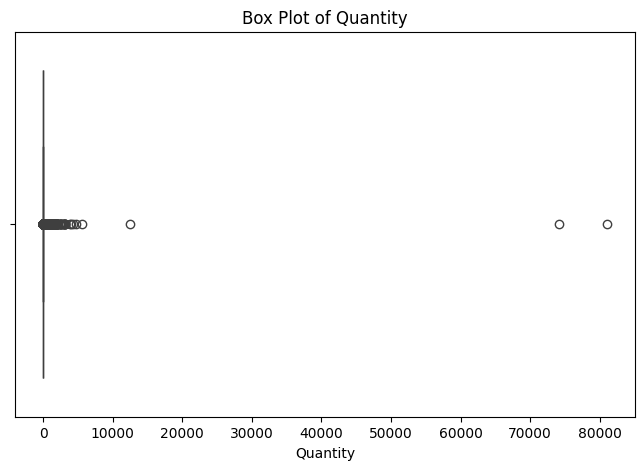

In [134]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=sales['Quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.show()

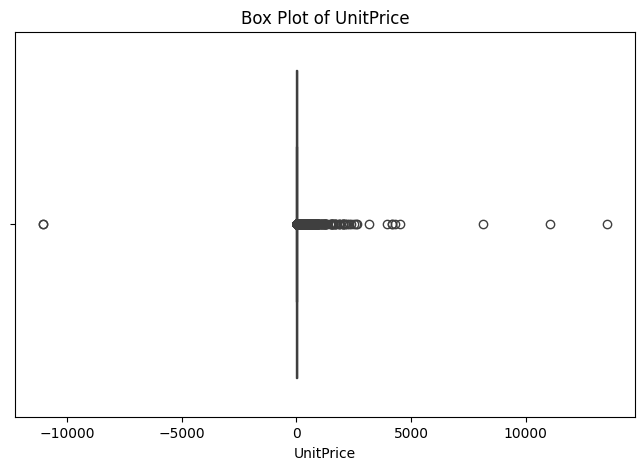

In [135]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=sales['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.xlabel('UnitPrice')
plt.show()

In [136]:
sales['Quantity'].mode()

,Quantity
0,1


In [137]:
sales[sales['Quantity']==1].shape[0]

148227

In [138]:
Q1 = sales['Quantity'].quantile(0.25)
Q3 = sales['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

-12.5 23.5


In [139]:
sales[sales['Quantity'] > upper_bound].shape[0]/sales.shape[0]*100

10.660003576234978

*  Around 10% of Quantity data are above upper limit



In [140]:
sales.loc[:, 'Quantity'] = sales['Quantity'].clip(lower=lower_bound, upper=upper_bound)

<ipython-input-140-8e942d8433e9>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6. 6. 8. ... 4. 4. 3.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [141]:
Q1 = sales['UnitPrice'].quantile(0.25)
Q3 = sales['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

-3.0700000000000003 8.45


In [142]:
sales.loc[:, 'UnitPrice'] = sales['UnitPrice'].clip(lower=lower_bound, upper=upper_bound)

In [143]:
sales[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,531285.000000,531285.000000
mean,6.718069,2.949514
std,7.157913,2.395352
min,1.000000,-3.070000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,23.500000,8.450000


In [144]:
sales.loc[:, 'SaleValue'] = sales['Quantity'] * sales['UnitPrice']

<ipython-input-144-265804de8b98>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **RFM analysis**

In [145]:
recent_date = sales['InvoiceDate'].max()
print(recent_date)

2011-12-09 12:50:00


In [146]:
sales['Recency'] = (recent_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

<ipython-input-146-3e7c84fd9287>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
sales['Frequency'] = sales.groupby('CustomerID')['InvoiceNo'].transform('nunique')

<ipython-input-147-4ce5555e24e6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [148]:
sales['Monetary'] = sales.groupby('CustomerID')['SaleValue'].transform('sum')

<ipython-input-148-f8f01d6fc2d4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
rfm = sales.groupby('CustomerID').agg({
    'Recency': 'first',
    'Frequency': 'first',
    'Monetary': 'first'
}).reset_index()

In [150]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]) # Lower the better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels=[1, 2, 3, 4, 5]) #Higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]) #Higher is better

In [151]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [152]:
rfm_segments = {
    r'[1-2][1-2][1-5]': 'Hibernating',
    r'[1-2][3-4][1-5]': 'At_risk',
    r'[1-2]5[1-5]': 'Cant_lose',
    r'3[1-2][1-5]': 'About_to_sleep',
    r'33[1-5]': 'Need_attention',
    r'[3-4][4-5][1-5]': 'Loyal_customers',
    r'41[1-5]': 'Promising',
    r'51[1-5]': 'New_customers',
    r'[4-5][2-3][1-5]': 'Potential_loyalists',
    r'5[4-5][1-5]': 'Champions'
}

"""
Champions         : These are your best customers who have made recent purchases, buy frequently, and spend the most.
Loyal Customers   : Customers who consistently buy and often spend decent amounts.
Potential Loyalist: These customers have recently made purchases and are on the verge of becoming loyal customers.
New Customers     : These customers have made their first purchase recently, so nurturing them can lead to repeat purchases.
Promising         : They’ve made a recent purchase but haven’t shown significant frequency yet, indicating potential for growth.
Need Attention    : Customers who haven’t bought recently but used to be frequent buyers. They need engagement to bring them back.
About to Sleep    : These customers have made a recent purchase but haven't shown significant frequency yet.
Can’t lose        : Previously high-value customers who haven’t purchased recently. They need retargeting to win them back.
At Risk           : Customers who used to purchase frequently but have not done so recently. They may be at risk of churning.
Hibernating       : These customers are the least engaged.They made very few purchases recently.
"""


rfm["Segment"] = rfm["RFM_Score"].replace(rfm_segments, regex=True)

In [153]:
segment_counts = rfm['Segment'].value_counts()
print(segment_counts)

Segment
Hibernating            1471
Loyal_customers        1107
Champions               974
At_risk                 968
About_to_sleep          648
Potential_loyalists     616
Promising               211
Need_attention          124
New_customers            96
Cant_lose                67
Name: count, dtype: int64


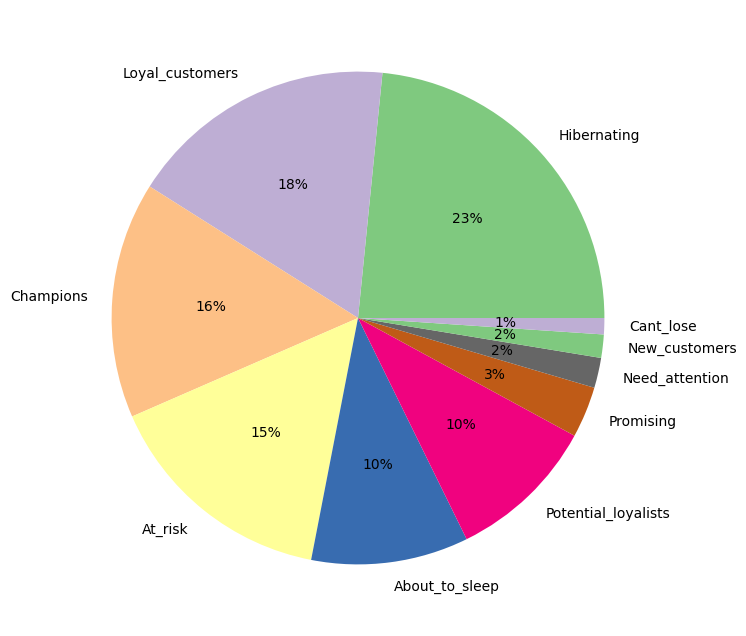

In [154]:
plt.figure(figsize=(8,8))
plt.pie(segment_counts, labels=rfm["Segment"].value_counts().index,  autopct="%.0f%%", colors= sns.color_palette("Accent"))
plt.show()

* 23% of the customers are Hibernating.
* 18% are Loyal Customers.
* 16% are Champions

In [155]:
import plotly.express as px
segments = rfm['Segment'].value_counts().sort_values(ascending = False).reset_index()
segments.columns = ['Segment', 'Count']
rfm = rfm.merge(segments, on='Segment', how='left')

In [156]:
fig = px.treemap(rfm, path=['Segment'], values='Count',
                 color='Count',
                 color_continuous_scale='Viridis')
fig.update_layout(
    title=dict(text="Customer Segmentation", font=dict(size=24)),
    margin=dict(l=0, r=0, t=40, b=0),
    height=700, width=1200)

fig.show()

In [157]:
rfm[["Recency","Frequency","Monetary","Segment"]].groupby("Segment").agg({'mean', 'min', 'max', 'std'})

Recency                             Frequency       \
                        min  max        mean        std       min  max   
Segment                                                                  
About_to_sleep           50  115   76.359568  18.526360         1    1   
At_risk                 116  372  247.344008  69.589611         1    4   
Cant_lose               120  364  198.268657  69.618350         4   34   
Champions                 0   17    6.983573   5.326130         2  210   
Hibernating             116  373  233.618627  76.913641         1    1   
Loyal_customers          18  115   49.157182  26.368419         2   63   
Need_attention           50  115   73.419355  17.045657         2    2   
New_customers             0   17    8.781250   5.396301         1    1   
Potential_loyalists       0   49   22.534091  14.278489         1    2   
Promising                18   49   32.236967   9.434524         1    1   

                                         Monetary                           \
                         mean        std      min         max         mean   
Segment                                                                      
About_to_sleep       1.000000   0.000000    0.000    3852.755   446.129840   
At_risk              1.754132   0.822061    0.000    7619.825   602.667620   
Cant_lose            6.119403   4.062103    0.000    5517.620  1191.651343   
Champions            9.908624  13.980050    0.000  113622.200  3329.340477   
Hibernating          1.000000   0.000000   -3.070    8418.170   377.328555   
Loyal_customers      4.932249   3.742614    0.000   33480.120  1524.865851   
Need_attention       2.000000   0.000000   29.375    3699.425   637.544919   
New_customers        1.000000   0.000000    0.000    1283.290   272.852917   
Potential_loyalists  1.375000   0.484516    0.000   12637.760   771.772386   
Promising            1.000000   0.000000    8.450    5084.955   302.596777   

                                  
                             std  
Segment                           
About_to_sleep        610.276422  
At_risk               857.836532  
Cant_lose            1084.452291  
Champions            6422.810741  
Hibernating           728.563733  
Loyal_customers      1800.640760  
Need_attention        458.702535  
New_customers         232.697304  
Potential_loyalists  1358.813984  
Promising             389.179772

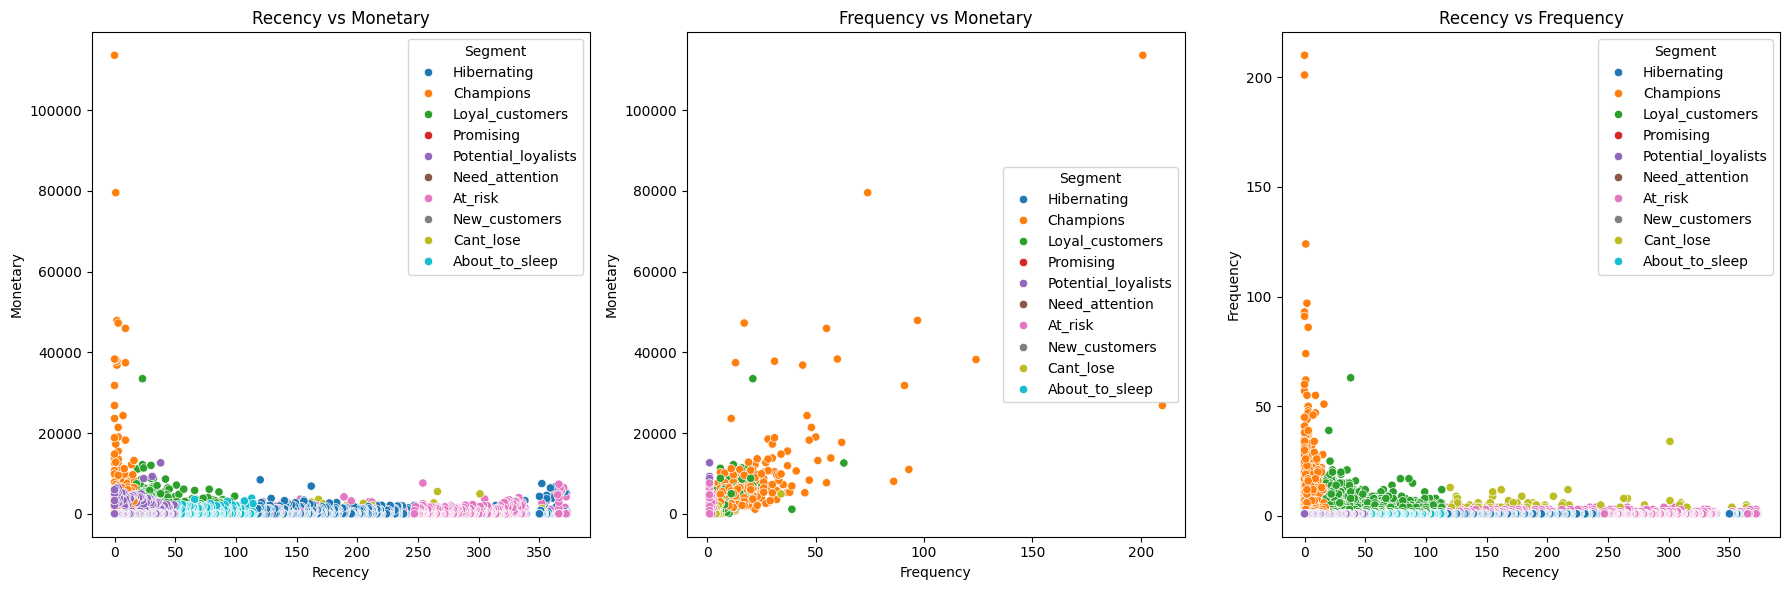

In [158]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Recency', y='Monetary', hue='Segment', data=rfm)
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Frequency', y='Monetary', hue='Segment', data=rfm)
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm)
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* Champions and Loyal_customers make purchases more often compared to other customer groups
* Champions spend significantly more per purchase compared to other segments, even when considering their high purchase frequency.
* Champions and Loyal_customers have recently made high-value purchases, while Potential_loyalists have also made recent purchases with high spending but may not have purchased as frequently.

Churn prediction

Churn_Prediction
No Churn    3469
Churn       2813
Name: count, dtype: int64
Overall Churn Rate: 44.78%


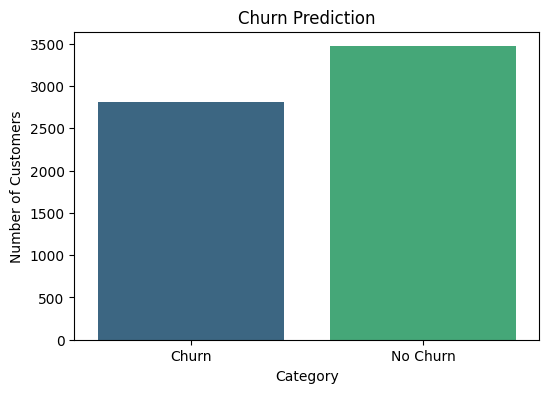

In [159]:
churn_threshold = 90 # Assuming the customer who have not made purchase in last 90 days as churned
rfm['Churn_Prediction'] = np.where(rfm['Recency'] > churn_threshold, 'Churn', 'No Churn')

churn_counts = rfm['Churn_Prediction'].value_counts()
print(churn_counts)

churn_rate = churn_counts['Churn'] / (churn_counts['Churn'] + churn_counts['No Churn'])
print(f"Overall Churn Rate: {churn_rate:.2%}")

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn_Prediction', data=rfm, palette='viridis', hue='Churn_Prediction')
plt.title('Churn Prediction')
plt.xlabel('Category')
plt.ylabel('Number of Customers')
plt.show()


*  The overall churn rate of 44.78% is relatively high, indicates a need for improved customer retention efforts. This could involve implementing loyalty programs, providing better customer support, or addressing issues that may be leading to customer dissatisfaction.

# **Customer Lifetime Value**

In [160]:
clv = sales.groupby('CustomerID').agg({'SaleValue': 'sum', 'InvoiceNo': 'nunique', 'InvoiceDate': ['min', 'max']})
clv['Tenure'] = (clv['InvoiceDate']['max'] - clv['InvoiceDate']['min']).dt.days
clv['CLV'] = clv['SaleValue']['sum'] / clv['InvoiceNo']['nunique'] * clv['Tenure']
clv.head()

SaleValue InvoiceNo         InvoiceDate                     Tenure  \
                 sum   nunique                 min                 max          
CustomerID                                                                      
12346         24.440         1 2011-01-18 10:01:00 2011-01-18 10:01:00      0   
12347       3849.115         7 2010-12-07 14:57:00 2011-12-07 15:52:00    365   
12348        512.760         4 2010-12-16 19:09:00 2011-09-25 13:13:00    282   
12349       1355.615         1 2011-11-21 09:51:00 2011-11-21 09:51:00      0   
12350        302.425         1 2011-02-02 16:01:00 2011-02-02 16:01:00      0   

                      CLV  
                           
CustomerID                 
12346            0.000000  
12347       200703.853571  
12348        36149.580000  
12349            0.000000  
12350            0.000000

In [161]:
clv = clv.round(2)
clv.columns = ['_'.join(col) for col in clv.columns]
clv = clv.rename(columns={'SaleValue_sum': 'SaleValue', 'InvoiceNo_nunique': 'Invoices', 'InvoiceDate_min': '1st_InvoiceDate', 'InvoiceDate_max': 'Last_InvoiceDate',
                          'Tenure_' : 'Tenure', 'CLV_' : 'CLV'})
clv.head()

,SaleValue,Invoices,1st_InvoiceDate,Last_InvoiceDate,Tenure,CLV
CustomerID,,,,,,
12346,24.44,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.00
12347,3849.12,7,2010-12-07 14:57:00,2011-12-07 15:52:00,365,200703.85
12348,512.76,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,36149.58
12349,1355.62,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.00
12350,302.42,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.00


In [162]:
bins = [-1, 1000, 5000, 10000, float('inf')]
labels = ['Low CLV', 'Medium CLV', 'High CLV', 'Very High CLV']
clv['CLV_Segment'] = pd.cut(clv['CLV'], bins=bins, labels=labels)
clv.head()


,SaleValue,Invoices,1st_InvoiceDate,Last_InvoiceDate,Tenure,CLV,CLV_Segment
CustomerID,,,,,,,
12346,24.44,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.00,Low CLV
12347,3849.12,7,2010-12-07 14:57:00,2011-12-07 15:52:00,365,200703.85,Very High CLV
12348,512.76,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,36149.58,Very High CLV
12349,1355.62,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.00,Low CLV
12350,302.42,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.00,Low CLV


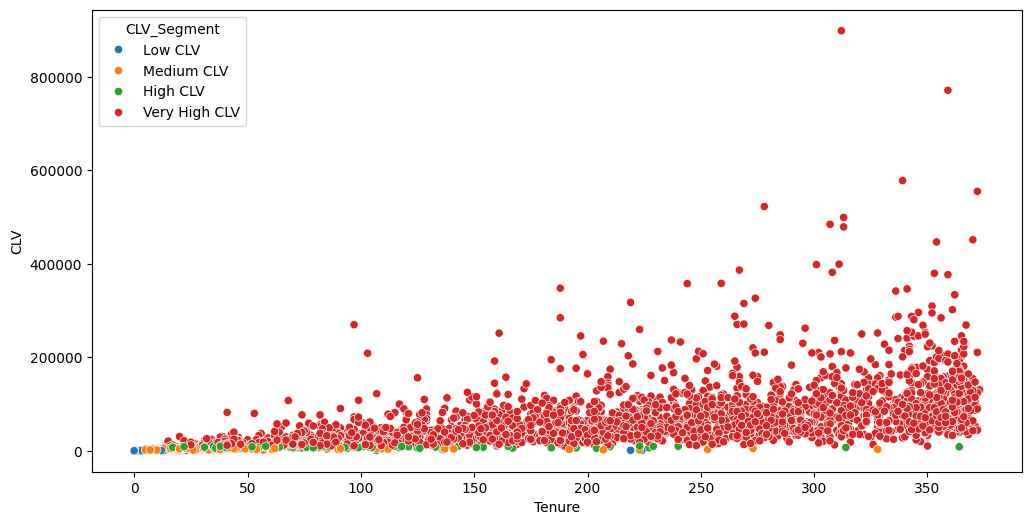

In [163]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tenure', y='CLV', hue='CLV_Segment', data=clv)
plt.show()

* There is a strong positive relationship between customer tenure and their overall value to the business.

In [164]:
clv['CLV_Segment'].value_counts(normalize=True) * 100

,proportion
CLV_Segment,
Low CLV,56.271888
Very High CLV,38.666030
High CLV,2.865330
Medium CLV,2.196753


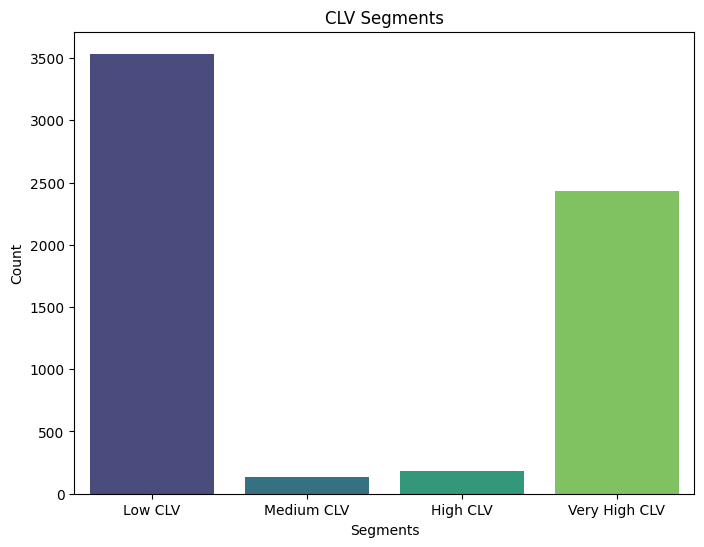

In [165]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CLV_Segment', data=clv, palette='viridis', hue='CLV_Segment')
plt.title('CLV Segments')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.show()

* Over half of customers (56.27%) have a low CLTV, indicating they are infrequent buyers, make small purchases, or have a short tenure. These customers may benefit from increased marketing efforts to encourage greater engagement.
* A significant portion (38.67%) of customers have a very high CLTV, making them valuable contributors to revenue. Retaining and nurturing these customers is essential for long-term business success.
* Only a small percentage (2.87%) of customers fall into the high CLTV category. Targeting them with upsell opportunities can potentially move them to the very high CLTV segment.
* 2.20% of customers have a medium CLV, suggesting they have potential but require nurturing to increase spending or purchase frequency.

In [166]:
rfm_clv = pd.merge(rfm, clv, on='CustomerID', how='left')

rfm_clv['Churn_Prediction_CLV'] = 'No Churn'
rfm_clv.loc[(rfm_clv['CLV_Segment'] == 'Low CLV') & (rfm_clv['Recency'] > churn_threshold), 'Churn_Prediction_CLV'] = 'Churn'

churn_by_clv = rfm_clv.groupby(['CLV_Segment', 'Churn_Prediction_CLV'])['CustomerID'].count().unstack()
churn_by_clv['Churn Rate'] = (churn_by_clv['Churn'] / (churn_by_clv['Churn'] + churn_by_clv['No Churn'])) * 100
churn_by_clv.round(2)

<ipython-input-166-4d855f74183f>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Churn_Prediction_CLV,Churn,No Churn,Churn Rate
CLV_Segment,,,
Low CLV,2285,1250,64.64
Medium CLV,0,138,0.00
High CLV,0,180,0.00
Very High CLV,0,2429,0.00


<Figure size 1000x600 with 0 Axes>

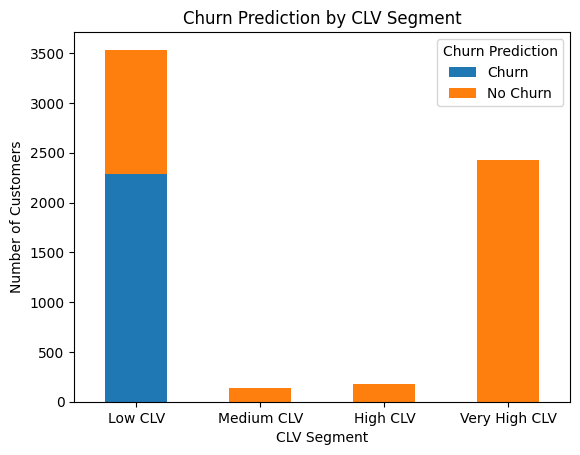

In [167]:
plt.figure(figsize=(10, 6))
churn_by_clv[['Churn', 'No Churn']].plot(kind='bar', stacked=True)
plt.title('Churn Prediction by CLV Segment')
plt.xlabel('CLV Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn Prediction')
plt.show()

* This suggests that customers with a low CLV are more likely to churn compared to other segments.
* Customers with higher CLVs are less likely to churn

# **Repeat purchase rate**

In [225]:
repeat_customers = sales.groupby('CustomerID')['InvoiceNo'].nunique() > 1
print(f"Repeat purchase rate: {repeat_customers.mean():.2%}")

Repeat purchase rate: 48.22%


# **Sales Trend Analysis**

In [169]:
sales.set_index('InvoiceDate', inplace=True)
monthly_sales = sales['SaleValue'].resample('ME').sum()
monthly_sales

,SaleValue
InvoiceDate,
2010-12-31,555037.660
2011-01-31,426179.930
2011-02-28,368267.450
2011-03-31,487165.920
2011-04-30,378578.626
2011-05-31,532336.825
2011-06-30,480884.695
2011-07-31,485317.386
2011-08-31,495130.340


<Axes: title={'center': 'Monthly Sales'}, xlabel='InvoiceDate'>

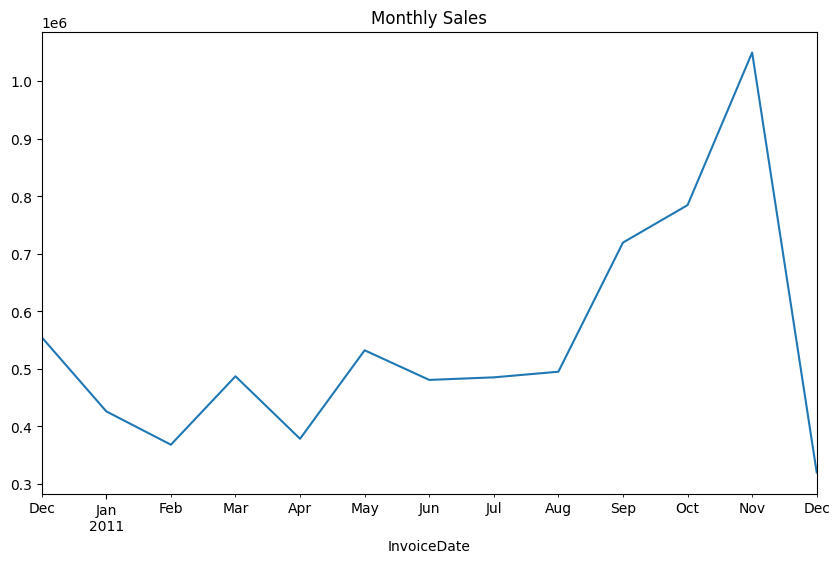

In [170]:
monthly_sales.plot(figsize=(10, 6), title='Monthly Sales')

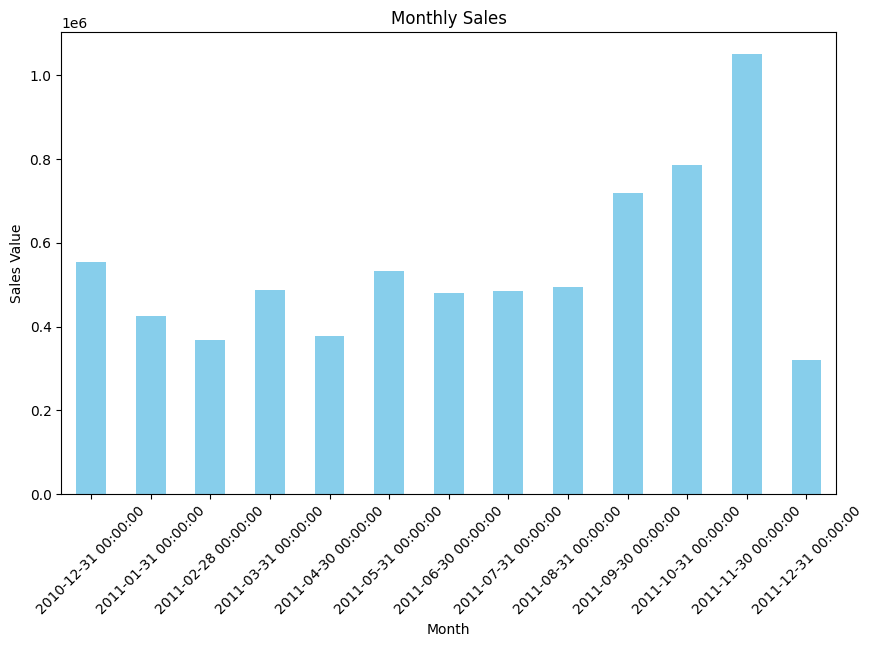

In [171]:
monthly_sales.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.show()

* The data shows a general upward trend in sales from Dec2010 to Nov2011, with a significant spike in November, Indicationg that the business experienced growth during this period.
* The exceptionally high sales value in Nov2011 indicates a significant event that influenced sales during that month.

# **Cohort anaysis**

In [172]:
sales.reset_index(inplace=True)

In [173]:
sales['FirstPurchaseMonth'] = sales.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
sales['InvoiceMonth'] = sales['InvoiceDate'].dt.to_period('M')
sales['CohortIndex'] = (sales['InvoiceMonth'] - sales['FirstPurchaseMonth']).apply(lambda x: x.n)
sales.head()

<ipython-input-173-4346db4337b1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-173-4346db4337b1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-173-4346db4337b1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sale_Value,SaleValue,Recency,Frequency,Monetary,FirstPurchaseMonth,InvoiceMonth,CohortIndex
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850,United Kingdom,15.30,15.30,301,34,4927.11,2010-12,2010-12,0
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850,United Kingdom,20.34,20.34,301,34,4927.11,2010-12,2010-12,0
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850,United Kingdom,22.00,22.00,301,34,4927.11,2010-12,2010-12,0
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850,United Kingdom,20.34,20.34,301,34,4927.11,2010-12,2010-12,0
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850,United Kingdom,20.34,20.34,301,34,4927.11,2010-12,2010-12,0


In [174]:
cohort_data = sales.groupby(['FirstPurchaseMonth', 'CohortIndex'])['CustomerID'].nunique().unstack().fillna(0)
cohort_size = cohort_data.iloc[:, 0]

In [175]:
retention = cohort_data.divide(cohort_size, axis=0)
retention

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstPurchaseMonth,,,,,,,,,,,,,
2010-12,1.0,0.301676,0.266294,0.316574,0.298883,0.327747,0.298883,0.287709,0.291434,0.325885,0.308194,0.414339,0.218808
2011-01,1.0,0.171004,0.206320,0.178439,0.249071,0.223048,0.191450,0.187732,0.232342,0.252788,0.282528,0.091078,0.000000
2011-02,1.0,0.142000,0.142000,0.216000,0.206000,0.188000,0.192000,0.212000,0.188000,0.232000,0.052000,0.000000,0.000000
2011-03,1.0,0.106918,0.179245,0.141509,0.158805,0.119497,0.190252,0.163522,0.198113,0.061321,0.000000,0.000000,0.000000
2011-04,1.0,0.142857,0.136161,0.140625,0.131696,0.151786,0.145089,0.174107,0.049107,0.000000,0.000000,0.000000,0.000000
2011-05,1.0,0.124424,0.112903,0.112903,0.135945,0.152074,0.172811,0.062212,0.000000,0.000000,0.000000,0.000000,0.000000
2011-06,1.0,0.107692,0.097436,0.164103,0.143590,0.207692,0.058974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07,1.0,0.092391,0.105978,0.114130,0.138587,0.057065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08,1.0,0.123675,0.148410,0.144876,0.074205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


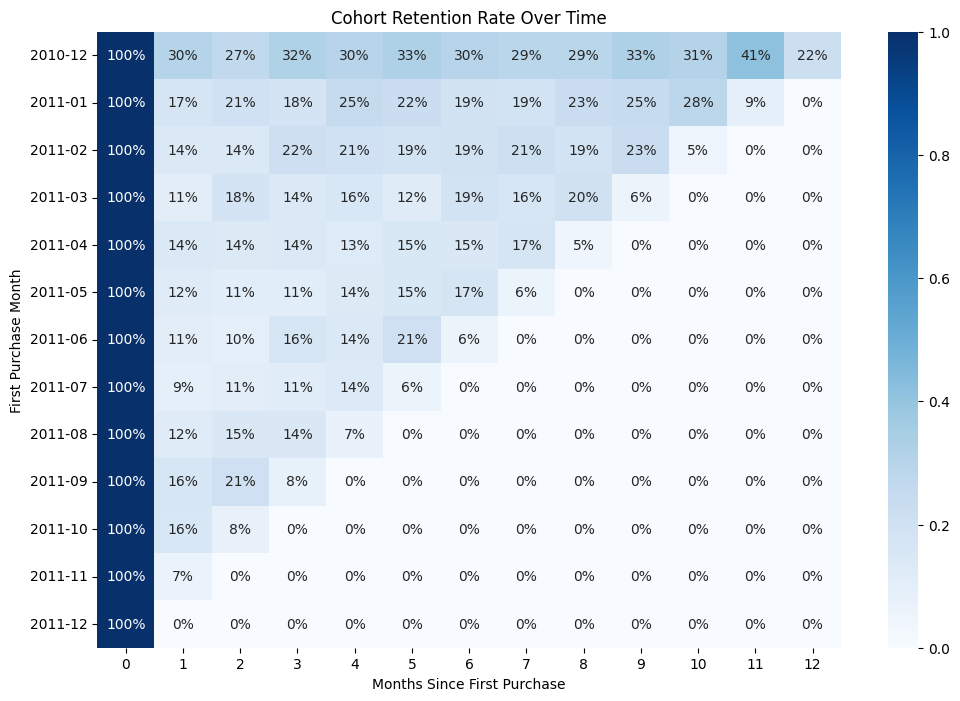

In [176]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Retention Rate Over Time')
plt.xlabel('Months Since First Purchase')
plt.ylabel('First Purchase Month')
plt.show()

* The December 2010 cohort seems to have a better long-term retention rate compared to others.

# **Sales by Country**

In [177]:
country_sales = sales.groupby('Country')['SaleValue'].sum().sort_values(ascending=False)
country_sales.head()

,SaleValue
Country,
United Kingdom,6097982.974
Germany,185534.770
EIRE,175931.710
France,160446.300
Netherlands,84160.500


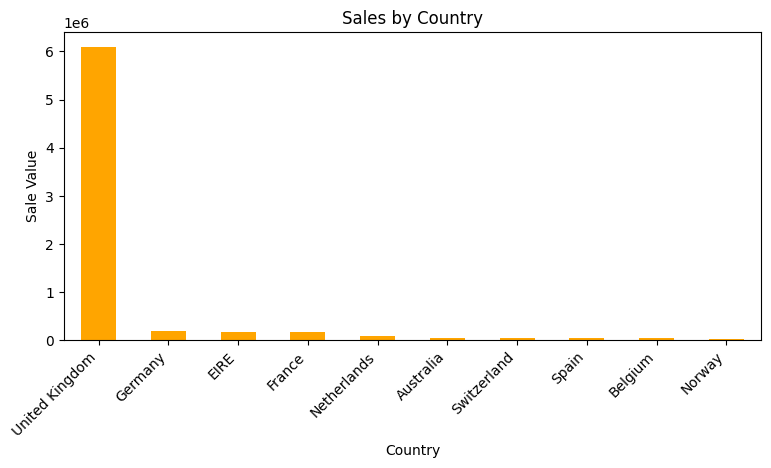

In [229]:
plt.figure(figsize=(9, 4))
country_sales.head(10).plot(kind='bar', color='orange')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Sale Value')
plt.xticks(rotation=45, ha='right')
plt.show()


* The United Kingdom is the most significant market, generating significantly higher sales revenue than the other countries.
* The remaining countries are all located in Europe, indicating that the company has a focus on European markets.
*  While the United Kingdom dominates, there is potential for growth in the other European markets, particularly Germany and France, which have relatively high sales values.

# **Average Order Value**

In [179]:
aov = sales.groupby('CustomerID')['SaleValue'].mean().sort_values(ascending=False)
aov.head()

,SaleValue
CustomerID,
17291,179.775
12823,179.775
15100,177.450
16716,171.550
14424,157.685


* Highest average order value is about $180

# **Product Affinity**

In [180]:
from itertools import combinations
product_pairs = sales.groupby('InvoiceNo')['StockCode'].apply(lambda x: list(combinations(x, 2)))
product_pairs = product_pairs.explode().value_counts().sort_values(ascending=False)
product_pairs.head()

,count
StockCode,
"(22697, 22698)",613
"(22386, 85099B)",542
"(22697, 22699)",527
"(22411, 85099B)",466
"(85099B, DOT)",461


* (22697, 22698), (22386, 85099B), (22697, 22699), (22411, 85099B), (85099B, DOT) are the top five product combinations.
* These combinations suggest that customers frequently purchase these products together, indicating a strong affinity or relationship between them.

# **Return analysis**

In [181]:
return_rate = returns.shape[0] / (returns.shape[0] + sales.shape[0])
print(f"Return Rate: {return_rate * 100:.2f}%")

Return Rate: 1.96%


In [182]:
returns.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Value
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96


In [183]:
return_value = returns['Sale_Value'].sum()
return_percentage_value = return_value / sales['Sale_Value'].sum()
print(f"Return Value: ${return_value:.2f}")
print(f"Return Percentage of Sales: {return_percentage_value * 100:.2f}%")

Return Value: $-896812.49
Return Percentage of Sales: -8.43%


In [184]:
customer_return_rate = returns.groupby('CustomerID')['InvoiceNo'].nunique() / sales.groupby('CustomerID')['InvoiceNo'].nunique()
customer_return_rate = customer_return_rate.fillna(0)
customer_return_rate.sort_values(ascending=False)

,InvoiceNo
CustomerID,
17603,4.0
16297,3.0
14339,3.0
13115,2.5
Unknown1064,2.0
...,...
16754,0.0
16753,0.0
16752,0.0


In [185]:
bins = [-1, 0.5, 1, 2, float('inf')]
labels = ['Low return rate', 'Moderate return rate', 'High return rate', 'Very high return rate']
return_rate_segs = pd.cut(customer_return_rate, bins=bins, labels=labels, include_lowest=True)
return_rate_segs.value_counts()


,count
InvoiceNo,
Low return rate,6998
Moderate return rate,479
High return rate,52
Very high return rate,4


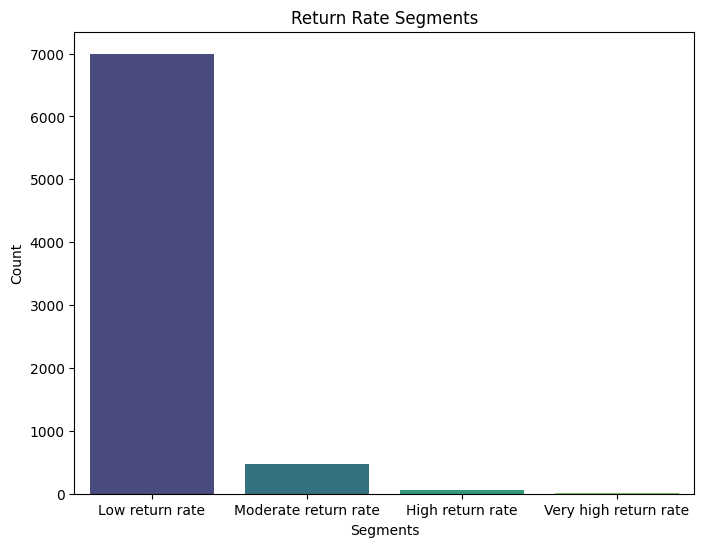

In [186]:
plt.figure(figsize=(8, 6))
sns.countplot(x=return_rate_segs, palette='viridis', hue=return_rate_segs)
plt.title('Return Rate Segments')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.show()

* Majority of invoices fall into the "Low return rate" category which indicates that most customers are satisfied with their purchases and are less likely to return items.

In [187]:
returned_products = returns.groupby('StockCode')['InvoiceNo'].count() / sales.groupby('StockCode')['InvoiceNo'].count()
returned_products = returned_products.fillna(0)
returned_products.sort_values(ascending=False)

,InvoiceNo
StockCode,
S,30.5
AMAZONFEE,16.0
85126,3.0
20703,3.0
84750A,3.0
...,...
23530,0.0
23529,0.0
23528,0.0


* S & AMAZONFEE are the most returnd products.